In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file = 'clean_data_v1.csv'
data = pd.read_csv(file, index_col = 0)
data.head()

,IncidentDate,IncidentTime,Incident Location: Street/Highway,Incident Location: Public Transport,Incident Location: Retail Premises,"Incident Location: Open ground (e.g. park, car park, field)",Incident Location: Licensed Premises,Incident Location: Sports or Event Stadia,Incident Location: Hospital/A&E (non-mental-health setting),Incident Location: Mental Health Setting,...,SubjectGender: Male,SubjectGender: Other,SubjectEthnicity: Asian,SubjectEthnicity: Black,SubjectEthnicity: Chinese,SubjectEthnicity: Unknown,SubjectEthnicity: Mixed,SubjectEthnicity: Other,SubjectEthnicity: White,Was Force Needed?
0,2020-04-01,00:12:00,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,2020-04-01,01:30:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,2020-04-01,03:30:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2020-04-01,04:25:00,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
4,2020-04-01,04:12:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [5]:
for i in data.columns:
    print(i)

IncidentDate
IncidentTime
Incident Location: Street/Highway
Incident Location: Public Transport
Incident Location: Retail Premises
Incident Location: Open ground (e.g. park, car park, field)
Incident Location: Licensed Premises
Incident Location: Sports or Event Stadia
Incident Location: Hospital/A&E (non-mental-health setting)
Incident Location: Mental Health Setting
Incident Location: Police vehicle with prisoner handling cage
Incident Location: Police vehicle without prisoner handling cage
Incident Location: Dwelling
Incident Location: Police station (excluding custody block)
Incident Location: Custody Block
Incident Location: Ambulance
Incident Location: Other
Borough
PrimaryConduct
AssaultedBySubject
Impact Factor: Possesion of a weapon
Impact Factor: Alcohol
Impact Factor: Drugs
Impact Factor: Mental Health
Impact Factor: Prior Knowledge
Impact Factor: Size/Gender/Build
Impact Factor: Acute Behavioural Disorder
Impact Factor: Crowd
Impact Factor: Other
Reason for Force: Protect s

# Primary Conduct Analysis

In [6]:
data['PrimaryConduct'].value_counts()

0    64058
3    26525
1    20243
4    18655
2    13017
5     5397
Name: PrimaryConduct, dtype: int64

Must class resistance levels / agression levels.

- 0 = Compliant
- 1 = Verbal resistance / gestures
- 2 = Passive resistance
- 3 = Active resistance
- 4 = Aggressive resistance
- 5 = Serious or Aggravated resistance

In [23]:
values = dict(data['PrimaryConduct'].value_counts())
values = pd.DataFrame(data = values, index = values.keys()).T
values.drop(columns = [3,1,4,2,5], inplace = True)
values.rename({0: 'Compliant',
              1: 'Verbal resistance/gestures',
              2: 'Passive resistance',
              3: 'Active resistance',
              4: 'Aggressive resistance',
              5: 'Serious or Aggravated resistance'}, inplace = True)
values.rename(columns = {0:'Counts'}, inplace = True)
values

,Counts
Compliant,64058
Active resistance,26525
Verbal resistance/gestures,20243
Aggressive resistance,18655
Passive resistance,13017
Serious or Aggravated resistance,5397


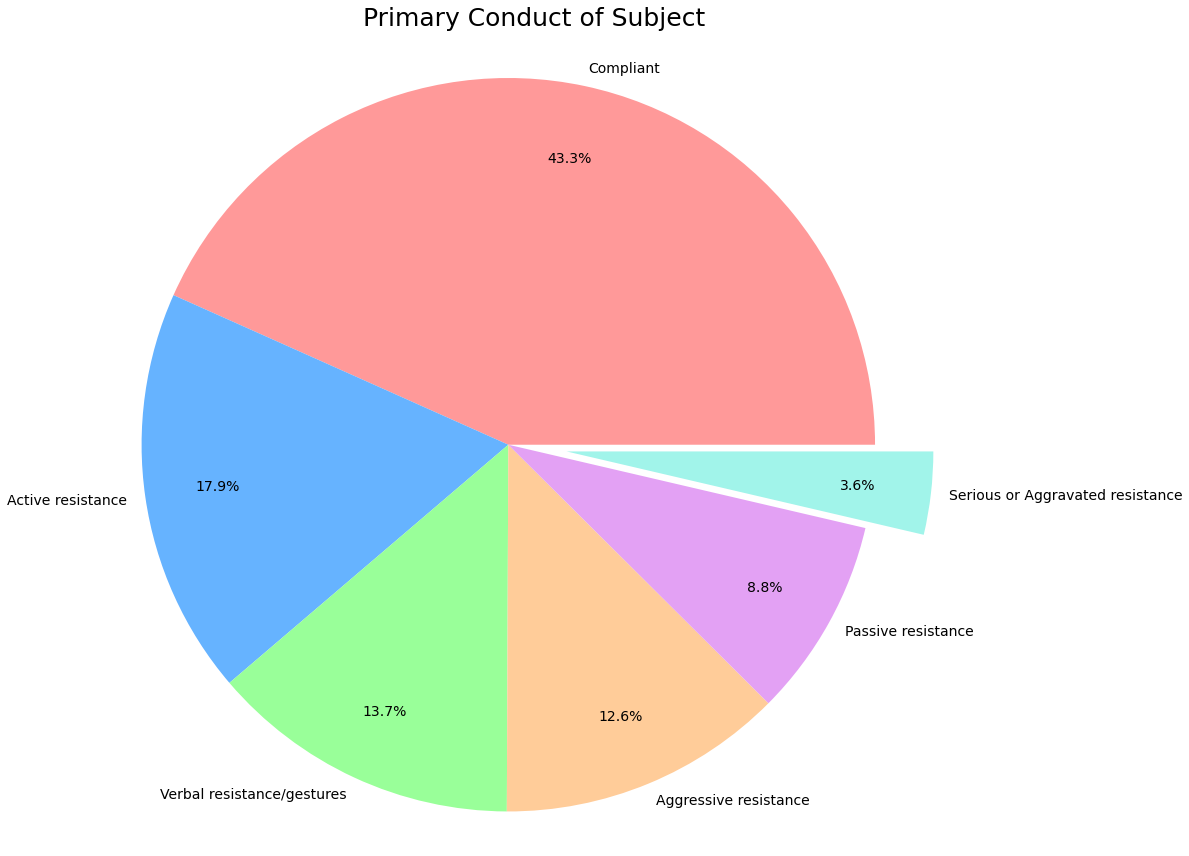

In [24]:
pie, ax = plt.subplots(figsize = (15,12))
labels = values.index
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#e3a1f4', '#a1f4ea']
plt.pie(x = values['Counts'], autopct="%.1f%%", explode=(0, 0, 0, 0, 0, 0.08), labels = labels,
       pctdistance = 0.8, colors = colors, labeldistance = 1.05, textprops = {'fontsize': 14}, radius = 0.5)
plt.title('Primary Conduct of Subject', fontsize = 25)
ax.axis('equal')
plt.tight_layout()

# Assaulted by Subject Analysis

In [25]:
data['AssaultedBySubject'].value_counts()

0    142968
1      4927
Name: AssaultedBySubject, dtype: int64

In [28]:
assault = dict(data['AssaultedBySubject'].value_counts())
assault = pd.DataFrame(data = assault, index = assault.keys()).T
assault.drop(columns = [1], inplace = True)
assault.rename(index = {0:'No', 1: 'Yes'},
              columns = {0: 'Counts'}, inplace = True)
assault

,Counts
No,142968
Yes,4927


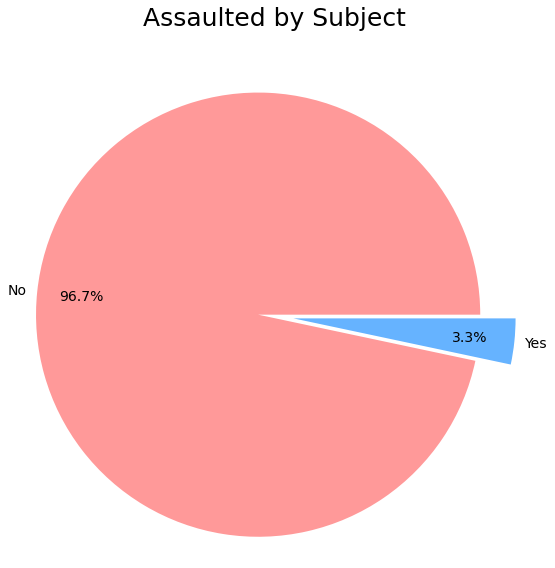

In [36]:
# Visualization
pie, ax = plt.subplots(figsize = (8,8))
labels = assault.index
colors = ['#ff9999','#66b3ff']
plt.pie(x = assault['Counts'], autopct="%.1f%%", explode=(0, 0.08), labels = labels,
       pctdistance = 0.8, colors = colors, labeldistance = 1.05, textprops = {'fontsize': 14}, radius = 0.5)
plt.title('Assaulted by Subject', fontsize = 25)
ax.axis('square')
plt.tight_layout()